In [ ]:
# mount google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
# path to code basis
sys.path.append('/content/drive/MyDrive/2024METFUT_project_data/Code/')

In [ ]:
# add personal code
from CNN_architecture import *

In [ ]:
# path to shared folder - containing relevant data
root_era5 = '/content/drive/MyDrive/2024METFUT_project_data/ERA5/'

In [ ]:
# load data
data_ocean = data_prep(root_era5, 5)
data_ocean.ocean()

# initialize first model and documentation
model1 = initialize_model(data_ocean, 4, 32, 3)
documentation1 = initialize_documentation(data_ocean)

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 33, 64, 2)]       0         
                                                                 
 periodic_conv2d (PeriodicC  (None, 33, 64, 32)        608       
 onv2D)                                                          
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 33, 64, 32)        0         
                                                                 
 periodic_conv2d_1 (Periodi  (None, 33, 64, 32)        9248      
 cConv2D)                                                        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 33, 64, 32)        0         
                                                                 
 periodic_conv2d_2 (Periodi  (None, 33, 64, 32)        9248  

In [ ]:
for i in range(40):
  training_cycle(model1, data_ocean, 5, documentation1)

Epoch 1/5
106/106 [==============================] - 5s 45ms/step - loss: 0.0849
Epoch 2/5
106/106 [==============================] - 5s 44ms/step - loss: 0.0849
Epoch 3/5
106/106 [==============================] - 5s 44ms/step - loss: 0.0849
Epoch 4/5
106/106 [==============================] - 5s 46ms/step - loss: 0.0849
Epoch 5/5
12/12 [==============================] - 0s 4ms/step
Epoch 1/5
106/106 [==============================] - 5s 46ms/step - loss: 0.0848
Epoch 2/5
106/106 [==============================] - 5s 45ms/step - loss: 0.0848
Epoch 3/5
106/106 [==============================] - 5s 45ms/step - loss: 0.0848
Epoch 4/5
106/106 [==============================] - 5s 46ms/step - loss: 0.0848
Epoch 5/5
12/12 [==============================] - 0s 4ms/step
Epoch 1/5
106/106 [==============================] - 5s 44ms/step - loss: 0.0848
Epoch 2/5
106/106 [==============================] - 5s 45ms/step - loss: 0.0848
Epoch 3/5
106/106 [==============================] - 5s 45ms/ste

In [ ]:
documentation1

{'variables': ['sst', 'siconc'],
 'training': [1,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5],
 'RMSE': {'train': [[0.19716403,
    0.06583066,
    0.060595635,
    0.059304997,
    0.058255304,
    0.05772602,
    0.0572731,
    0.05693649,
    0.056623645,
    0.056469597,
    0.056235105,
    0.056102835,
    0.055958804,
    0.05582827,
    0.055697452,
    0.05567427,
    0.055529922,
    0.055430785,
    0.055410028,
    0.05528607,
    0.05518025,
    0.05515494],
   [0.20601809,
    0.11341689,
    0.11120653,
    0.11040269,
    0.10974026,
    0.10946975,
    0.10888947,
    0.10860418,
    0.1085199,
    0.10820797,
    0.10838959,
    0.108054,
    0.10768531,
    0.10756141,
    0.10746645,
    0.10729454,
    0.10716377,
    0.10705362,
    0.10707022,
    0.107075386,
    0.10675373,
    0.10677651]],
  'valid': [[0.20247132,
    0.06135697,
    0.05518871,
    0.053741496,
    0.05245149,
    0.05190122,
    0

In [ ]:
import matplotlib.pyplot as plt

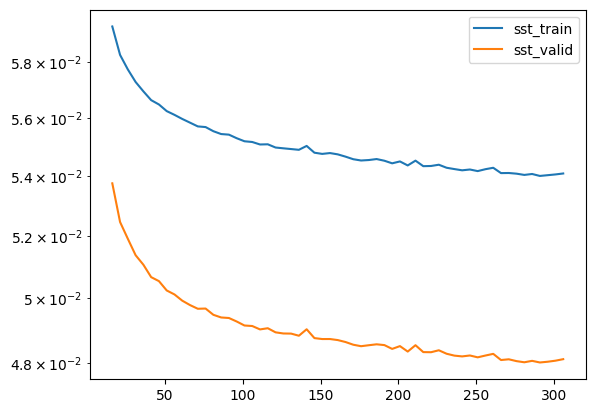

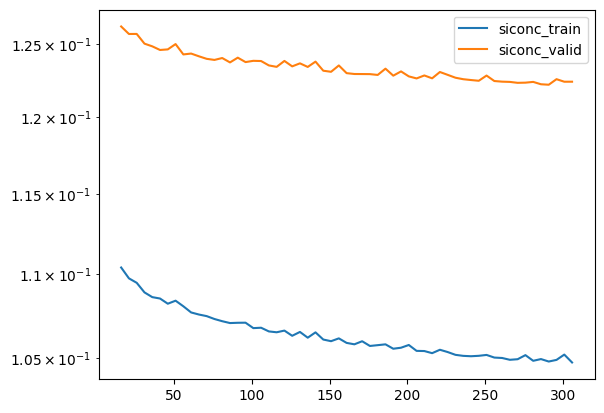

In [42]:
train_sst = documentation1['RMSE']['train'][0]
valid_sst = documentation1['RMSE']['valid'][0]

train_siconc = documentation1['RMSE']['train'][1]
valid_siconc = documentation1['RMSE']['valid'][1]

training = documentation1['training']

training_sum = [training[0]]
for i in training[1:]: training_sum.append(training_sum[-1]+i)

plt.plot(training_sum[3:], train_sst[3:], label='sst_train')
plt.plot(training_sum[3:], valid_sst[3:], label='sst_valid')
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(training_sum[3:], train_siconc[3:], label='siconc_train')
plt.plot(training_sum[3:], valid_siconc[3:], label='siconc_valid')
plt.yscale('log')
plt.legend()

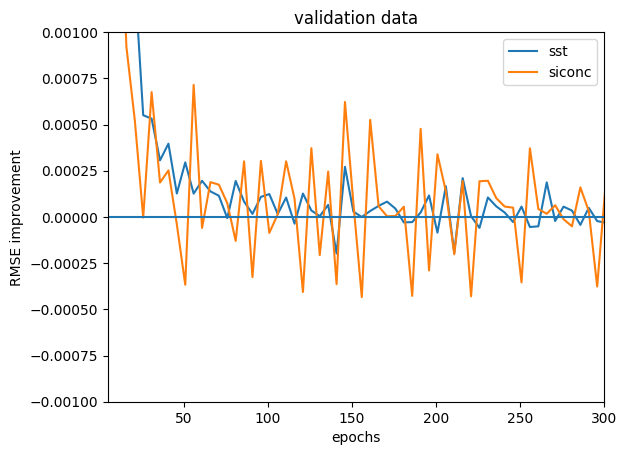

In [38]:
plt.plot(training_sum[1:], np.array(valid_sst[0:-1])-np.array(valid_sst[1:]), label='sst')
plt.plot(training_sum[1:], np.array(valid_siconc[0:-1])-np.array(valid_siconc[1:]), label='siconc')
plt.hlines(0,0,300)
plt.xlim((5,300))
plt.ylim((-1e-3,1e-3))
plt.ylabel('RMSE improvement')
plt.xlabel('epochs')
plt.title('validation data')
plt.legend()

In [28]:
np.array(valid_sst[0:-1])-np.array(valid_sst[1:]),np.array(train_sst[0:-1])-np.array(train_sst[1:])

(array([ 1.41114354e-01,  6.16825745e-03,  1.44721568e-03,  1.29000470e-03,
         5.50270081e-04,  5.32090664e-04,  3.06326896e-04,  3.96288931e-04,
         1.26715750e-04,  2.95072794e-04,  1.26138330e-04,  1.95350498e-04,
         1.38156116e-04,  1.14649534e-04, -6.45220280e-06,  1.94467604e-04,
         8.27759504e-05,  1.65887177e-05,  1.08446926e-04,  1.23638660e-04,
         1.57468021e-05,  1.04863197e-04, -3.64929438e-05,  1.26399100e-04,
         3.49432230e-05,  3.98606062e-06,  6.50994480e-05, -1.98099762e-04,
         2.70944089e-04,  2.88002193e-05, -5.14090061e-07,  3.20114195e-05,
         5.96083701e-05,  8.27014446e-05,  4.49046493e-05, -2.98023224e-05,
        -2.79545784e-05,  2.39908695e-05,  1.16065145e-04, -8.50707293e-05,
         1.65980309e-04, -1.93744898e-04,  2.09886581e-04,  3.60235572e-06,
        -5.91836870e-05,  1.05369836e-04,  5.70937991e-05,  2.36891210e-05,
        -2.77981162e-05,  5.58458269e-05, -5.46276569e-05, -5.08315861e-05,
         1.8

423/423 [==============================] - 2s 4ms/step


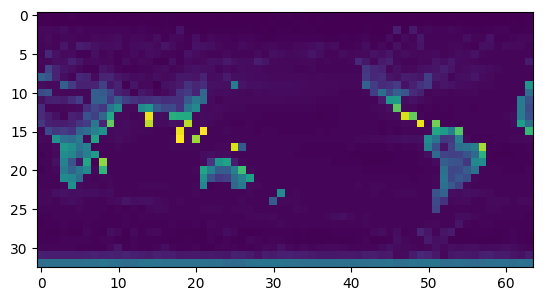

423/423 [==============================] - 2s 5ms/step


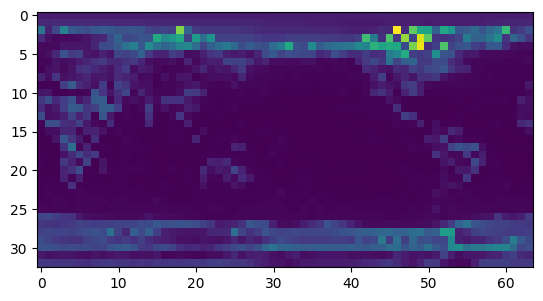

In [45]:
plt.imshow(np.mean(np.abs((model1.predict(data_ocean.X_train)[:,:,:,0]-data_ocean.Y_train[:,:,:,0])),axis=0))
plt.show()
plt.imshow(np.mean(np.abs((model1.predict(data_ocean.X_train)[:,:,:,1]-data_ocean.Y_train[:,:,:,1])),axis=0))

423/423 [==============================] - 2s 4ms/step


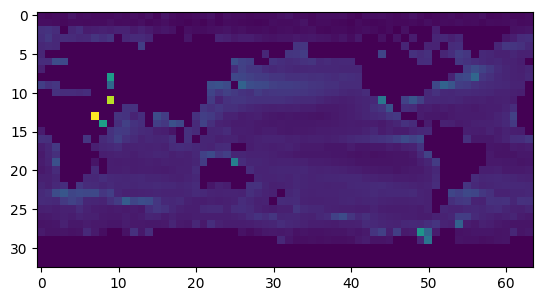

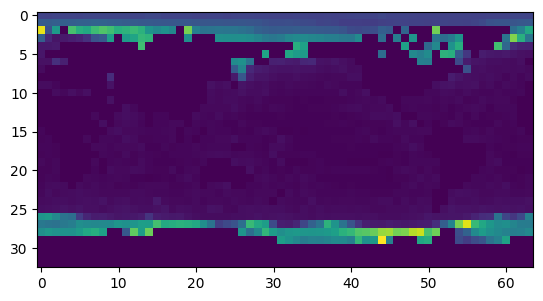

In [46]:
predict = model1.predict(data_ocean.X_train)*data_ocean.surface_mask
truth   = data_ocean.Y_train*data_ocean.surface_mask

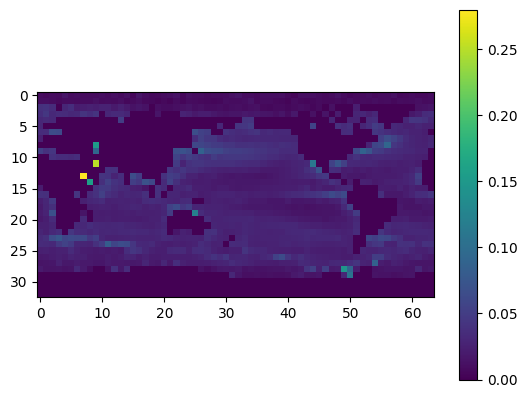

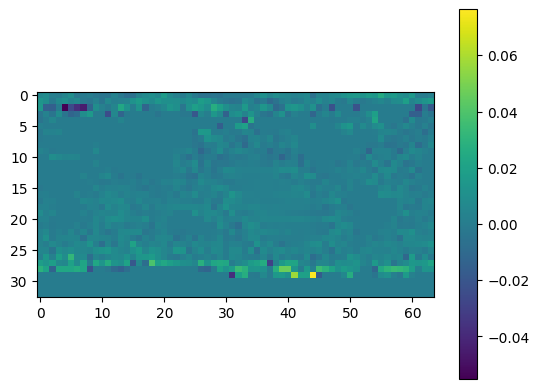

In [48]:
plt.imshow(np.mean(np.abs((predict[:,:,:,0]-truth[:,:,:,0])),axis=0))
plt.colorbar()
plt.show()
plt.imshow(np.mean((predict[:,:,:,1]-truth[:,:,:,1]),axis=0))
plt.colorbar()

In [50]:
root_model = '/content/drive/MyDrive/2024METFUT_project_data/Model/'

In [51]:
model1.save(root_model+'001model_ocean.keras')

In [52]:
import pickle

def dump_data(rootdir, data, name):
    '''
    saves given data in directory of raw data
    # maybe one could add date to filename
    '''
    with open(rootdir+name+'.pickle', 'wb') as f:
        pickle.dump(data, f)

In [53]:
dump_data(root_model,documentation1,'001documentation_ocean')